<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/exercise_5(AQM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

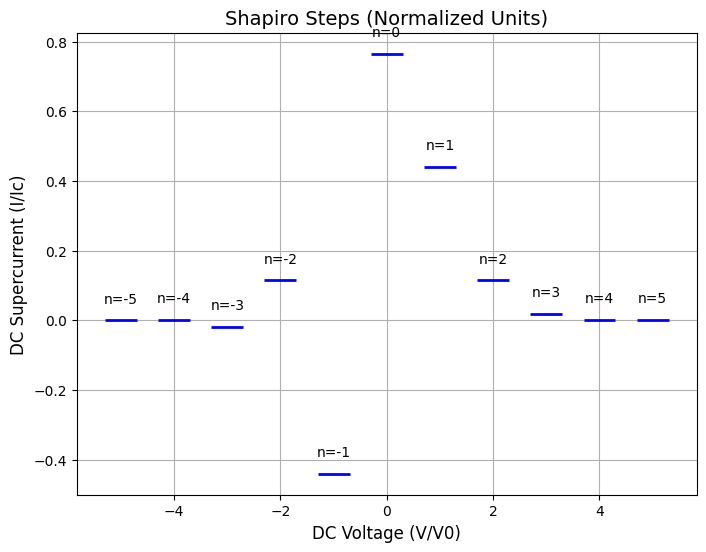

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn

# 1. Shapiro Steps
# Parameters (normalized units)
Ic = 1.0        # Critical current (normalized)
alpha = 1.0     # AC drive amplitude (normalized)
V0 = 1.0        # Voltage step unit = (ħ ω_RF)/(2e) in normalized units
n_range = np.arange(-5, 6)  # Consider step indices from -5 to 5

# Calculate step amplitudes using Bessel functions: I_dc = I_c J_n(α)
I_shapiro = Ic * np.array([jn(n, alpha) for n in n_range])

plt.figure(figsize=(8, 6))
# Plot horizontal lines to mimic voltage plateaus
for n, I_step in zip(n_range, I_shapiro):
    # Each step appears at a voltage V = n*V0. We draw a short horizontal line.
    plt.hlines(I_step, n*V0 - 0.3, n*V0 + 0.3, colors='b', lw=2)
    plt.text(n*V0, I_step + 0.05, f'n={n}', ha='center', fontsize=10)
plt.xlabel("DC Voltage (V/V0)", fontsize=12)
plt.ylabel("DC Supercurrent (I/Ic)", fontsize=12)
plt.title("Shapiro Steps (Normalized Units)", fontsize=14)
plt.grid(True)
plt.show()

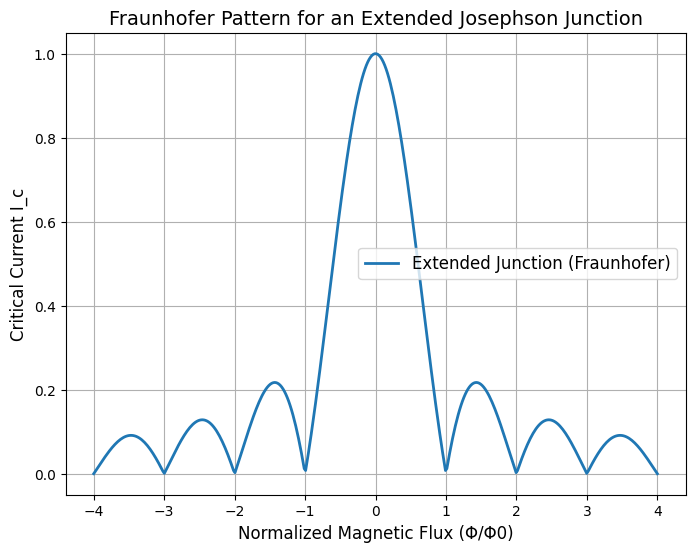

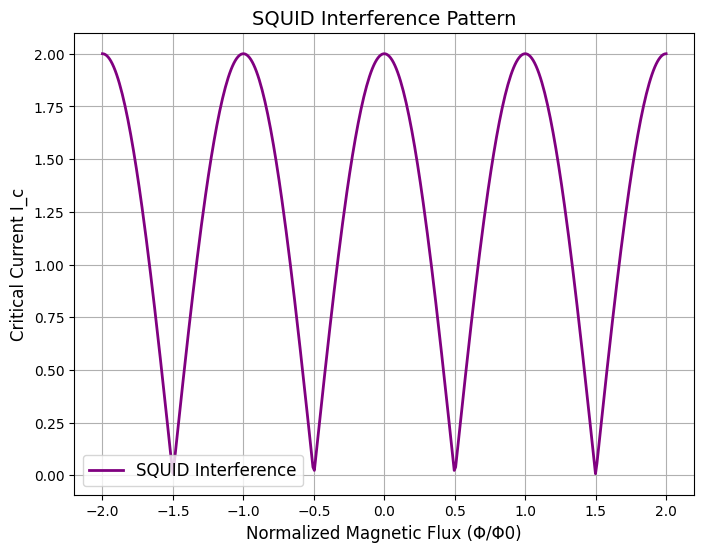

In [2]:
# 2. Fraunhofer Pattern and SQUID Interference

# 2a. Fraunhofer Pattern for an Extended Junction
# The critical current as a function of flux is:
# I_c(Φ) = I_c0 * |sin(pi*Φ/Φ0)/(pi*Φ/Φ0)|
# We use the normalized variable: phi = Φ/Φ0 (so that phi=1 means one flux quantum).
phi = np.linspace(-4, 4, 400)
I0 = 1.0
# np.sinc(x) = sin(pi*x)/(pi*x), so we can write:
I_fraunhofer = I0 * np.abs(np.sinc(phi))

plt.figure(figsize=(8, 6))
plt.plot(phi, I_fraunhofer, label="Extended Junction (Fraunhofer)", lw=2)
plt.xlabel("Normalized Magnetic Flux (Φ/Φ0)", fontsize=12)
plt.ylabel("Critical Current I_c", fontsize=12)
plt.title("Fraunhofer Pattern for an Extended Josephson Junction", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 2b. SQUID Interference Pattern
# For a symmetric SQUID with two identical junctions, the total critical current is:
# I_c(Φ) = 2 I_c0 * |cos(pi*Φ/Φ0)|
flux = np.linspace(-2, 2, 400)
I_squid = 2 * I0 * np.abs(np.cos(np.pi * flux))

plt.figure(figsize=(8, 6))
plt.plot(flux, I_squid, label="SQUID Interference", lw=2, color='purple')
plt.xlabel("Normalized Magnetic Flux (Φ/Φ0)", fontsize=12)
plt.ylabel("Critical Current I_c", fontsize=12)
plt.title("SQUID Interference Pattern", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

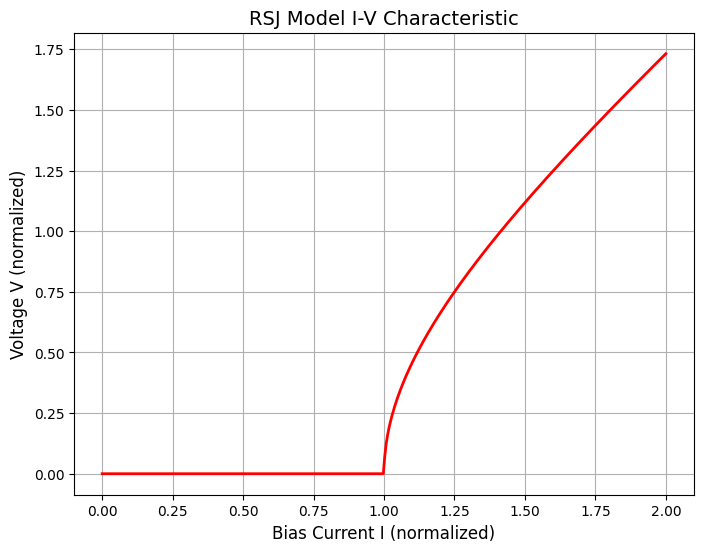

In [3]:
# 3. RSJ (Resistively Shunted Junction) Model
# The RSJ model yields an I-V curve given by:
# For I <= I_c, V = 0 (zero-voltage state)
# For I > I_c, V = R * sqrt(I^2 - I_c^2)
# Here, we assume R = 1 (normalized) and Ic = 1.
I = np.linspace(0, 2, 400)
Ic_value = 1.0
R = 1.0
V_RSJ = np.zeros_like(I)
for idx, I_val in enumerate(I):
    if I_val > Ic_value:
        V_RSJ[idx] = R * np.sqrt(I_val**2 - Ic_value**2)
    else:
        V_RSJ[idx] = 0.0

plt.figure(figsize=(8, 6))
plt.plot(I, V_RSJ, 'r', lw=2)
plt.xlabel("Bias Current I (normalized)", fontsize=12)
plt.ylabel("Voltage V (normalized)", fontsize=12)
plt.title("RSJ Model I-V Characteristic", fontsize=14)
plt.grid(True)
plt.show()